# ECE657A - Assignment 2 - Demo Code for Asg1 "Solution"

> *Disclaimer*: this code is just Prof. Crowley's own solution to the questions for asg1, often many students came up with better approaches. But this can be treated as a baseline for asg2 and beyond if needed. Please do not distribute to anyone. -- Mark Crowley, Feb 2023.

## Load Libraries

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
print('The scikit-learn versionis {}.'.format(sklearn.__version__))

The scikit-learn versionis 1.2.0.


## Initial Settings

In [4]:
# Use same random value whenever needed ran=42
ran = 27
kmax=40; kstep=1
trainsize=.8; testsize=.2; #valsize=.1
epsilon=0
# str_stattoplot = 'accuracy'
str_stattoplot = 'recall'


# Load the Data

In [3]:
# Choose which dataset to load
datasets = ['abalone', 'wine']

use_dataset = 0
print("Use dataset ", datasets[use_dataset])

Use dataset  abalone


In [5]:
#Loading Data set
if datasets[use_dataset] == 'abalone':
    Xcategorycolnames = ['Sex']
    Xcolnames = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']  
    Ycolname = 'Rings'
    DS = pd.read_csv("abalone.csv", sep=',')
    DS.columns=Xcategorycolnames + Xcolnames+[Ycolname]
    
    # For now remove 'Sex' column
    D = DS.drop(columns=['Sex'])
    print(D.columns)
    
    
    # Define subsets of X columns to use for large plots or tables
    Xs1 = Xcolnames
    Xs2 = ['Length',  'Height', 'Shucked weight',  'Shell weight']
    
    # List 3 columns to use as colours ("hue") for pairs plot
    var_for_hue = [Ycolname,'Length', 'Height']


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [6]:
#Loading Data set
if datasets[use_dataset] == 'wine':

    wine_r = pd.read_csv("winequality-red.csv", sep=';')
    wine_r["colour"]=1
    #Loading Data set
    wine_w = pd.read_csv("winequality-white.csv", sep=';')
    wine_w["colour"]=0
    D = pd.concat([wine_w,wine_r])

    Xcolnames = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour']
    Ycolname = 'quality'
    # an alternative label 
    # C = 'color'

    # Define subsets of X columns to use for large plots or tables
    Xs1 = ['density',  'residual sugar', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'colour']
    Xs2 = [ 'fixed acidity','pH', 'chlorides', 'alcohol', 'colour']

    # List 3 columns to use as colours ("hue") for pairs plot
    var_for_hue = [Ycolname,'colour', 'pH']

In [7]:
if datasets[use_dataset] == 'ENB':
    D = pd.read_csv("../ENB2012_data.csv", sep=',')

    Xcolnames = ['X{}'.format(i) for i in range(1,9)]
    print(Xcolnames)
    # Ycolname = 'Y1'
    Ycolname = 'Y2'

    # Define subsets of X columns to use for large plots or tables
    Xs1 = ['X1', 'X2', 'X3']
    Xs2 = Xcolnames

# Name loaded data

In [8]:
# Any Dataset : Assign the data to variables
X = D[Xcolnames]+epsilon
Y = D[Ycolname]
Dname = datasets[use_dataset]
D.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   Shell weight  Rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
3         0.055      7  
4         0.120      8

# Helper Functions (plotting)

In [9]:
def my_plt_gca(title, xlabel, ylabel):
    ax = plt.gca()
    ax.set_title('(' + datasets[use_dataset] + ') ' + title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax


In [10]:
# return a usable text title string for the plotname plot with 
# standard other info about experiemnts and data being run
def getPlotTitle(plotname):
        return '(' + Dname + ') ' + plotname + ' : ' + txt_exper_info_short

In [11]:
def print_title(specific='', general=''):
    display(Markdown('### '+ generate_title(specific, general)))
            
# print_title('Pairs Plots', 'Xs2 features')

In [12]:
def generate_title(specific='', general=''):
    return '(' + Dname + ') ' + specific + ' [' + general + ']'

# Exploratory Data Analysis
We qualitatively assess the data by looking at a standard set of statistics for each feature.

In [13]:
X.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4176.000000  4176.000000  4176.000000   4176.000000      4176.00000   
mean      0.524009     0.407892     0.139527      0.828818         0.35940   
std       0.120103     0.099250     0.041826      0.490424         0.22198   
min       0.075000     0.055000     0.000000      0.002000         0.00100   
25%       0.450000     0.350000     0.115000      0.441500         0.18600   
50%       0.545000     0.425000     0.140000      0.799750         0.33600   
75%       0.615000     0.480000     0.165000      1.153250         0.50200   
max       0.815000     0.650000     1.130000      2.825500         1.48800   

       Viscera weight  Shell weight  
count     4176.000000   4176.000000  
mean         0.180613      0.238852  
std          0.109620      0.139213  
min          0.000500      0.001500  
25%          0.093375      0.130000  
50%          0.171000      0.234000  
75%          0.253000      0.329000  
max          0.760000      1.005000

In [14]:
Y.describe()

count    4176.000000
mean        9.932471
std         3.223601
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

In [15]:
# Summary momemt statistics of Data
S = pd.DataFrame(columns=['mean', 'median','variance','skew','kurtosis'])
S['mean'] = D.mean()
S['median'] = D.median()
S['variance'] = D.var()
S['skew'] = D.skew()
S['kurtosis'] = D.kurtosis()
display(S)




mean   median   variance      skew   kurtosis
Length          0.524009  0.54500   0.014425 -0.640240   0.064698
Diameter        0.407892  0.42500   0.009850 -0.609457  -0.045675
Height          0.139527  0.14000   0.001749  3.129241  76.046000
Whole weight    0.828818  0.79975   0.240515  0.530576  -0.024136
Shucked weight  0.359400  0.33600   0.049275  0.718724   0.594448
Viscera weight  0.180613  0.17100   0.012017  0.591463   0.083574
Shell weight    0.238852  0.23400   0.019380  0.620547   0.531350
Rings           9.932471  9.00000  10.391606  1.115157   2.335940

## Questions to Answer

### Is our data set balanced?
There are many ways to answer this question, one way is to look at the range of features relative to each other and to the range of values of the class labels. Another way is to look at the proportion of the data in each class.

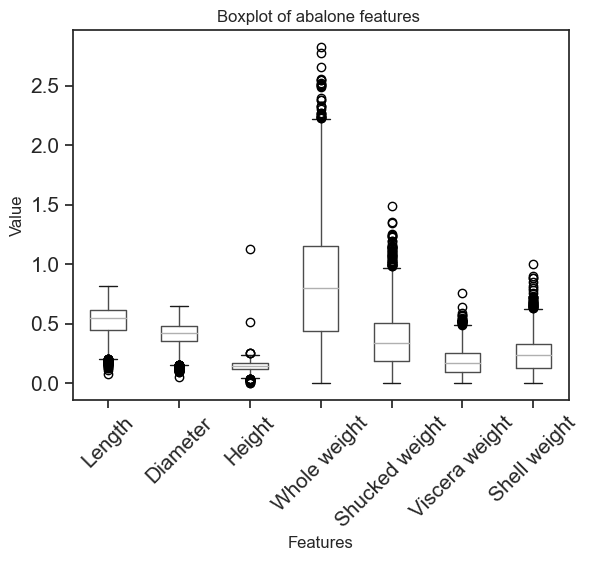

In [16]:
use_log_scale=False

scale_text=''
if use_log_scale:
    scale_text='Log-Scale'
    ylabel_text='Log-Value'
    XX = np.log(X)
else:
    ylabel_text='Value'
    XX = X
    
ax = plt.gca()
ax.set_xlabel('Features')
ax.set_ylabel(ylabel_text)
ax.set_title('Boxplot of {} features {}'.format(Dname, scale_text))
ax = pd.plotting.boxplot(XX, grid=False, rot=45, fontsize=15, figsize=(20,20))

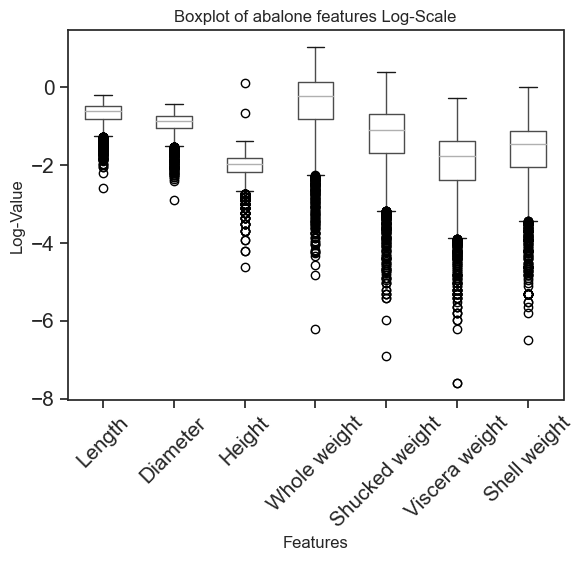

In [17]:
use_log_scale=True
scale_text=''
if use_log_scale:
    scale_text='Log-Scale'
    ylabel_text='Log-Value'
    XX = np.log(X)
else:
    ylabel_text='Value'
    XX = X
    
ax = plt.gca()
ax.set_xlabel('Features')
ax.set_ylabel(ylabel_text)
ax.set_title('Boxplot of {} features {}'.format(Dname, scale_text))
ax = pd.plotting.boxplot(XX, grid=False, rot=45, fontsize=15, figsize=(20,20))

### Do we have any missing data?

In [18]:
missing = D.isnull().sum()
display(D.describe())
display(missing)

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4176.000000  4176.000000  4176.000000   4176.000000      4176.00000   
mean      0.524009     0.407892     0.139527      0.828818         0.35940   
std       0.120103     0.099250     0.041826      0.490424         0.22198   
min       0.075000     0.055000     0.000000      0.002000         0.00100   
25%       0.450000     0.350000     0.115000      0.441500         0.18600   
50%       0.545000     0.425000     0.140000      0.799750         0.33600   
75%       0.615000     0.480000     0.165000      1.153250         0.50200   
max       0.815000     0.650000     1.130000      2.825500         1.48800   

       Viscera weight  Shell weight        Rings  
count     4176.000000   4176.000000  4176.000000  
mean         0.180613      0.238852     9.932471  
std          0.109620      0.139213     3.223601  
min          0.000500      0.001500     1.000000  
25%          0.093375      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [19]:
if (missing>0).any():
    print('There are {} missing data points!'.format(int(np.sum(missing))))
    print(np.where(missing>0))
    # display(missing)
else:
    display('Great! No missing data!')

'Great! No missing data!'

*NOTE: you should say more than this...*


# Define the Data Splits

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testsize, random_state = ran) 


In [21]:
X_train.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  3340.000000  3340.000000  3340.000000   3340.000000     3340.000000   
mean      0.525692     0.409439     0.139778      0.836695        0.362507   
std       0.120274     0.099456     0.039042      0.492805        0.223013   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.448250        0.189500   
50%       0.545000     0.425000     0.145000      0.809750        0.341000   
75%       0.615000     0.485000     0.165000      1.165000        0.508125   
max       0.815000     0.650000     0.515000      2.825500        1.488000   

       Viscera weight  Shell weight  
count     3340.000000   3340.000000  
mean         0.182300      0.241131  
std          0.109886      0.139994  
min          0.000500      0.001500  
25%          0.094875      0.132500  
50%          0.172500      0.235000  
75%          0.256125      0.330000  
max          0.760000      1.005000

In [22]:
X_test.describe()

Length    Diameter      Height  Whole weight  Shucked weight  \
count  836.000000  836.000000  836.000000    836.000000      836.000000   
mean     0.517285    0.401711    0.138523      0.797344        0.346987   
std      0.119251    0.098236    0.051486      0.479791        0.217492   
min      0.140000    0.105000    0.015000      0.014000        0.005500   
25%      0.445000    0.340000    0.110000      0.392875        0.169875   
50%      0.535000    0.415000    0.140000      0.756750        0.321750   
75%      0.605000    0.475000    0.165000      1.107875        0.485375   
max      0.780000    0.600000    1.130000      2.550000        1.194500   

       Viscera weight  Shell weight  
count      836.000000    836.000000  
mean         0.173873      0.229748  
std          0.108355      0.135746  
min          0.002500      0.004000  
25%          0.085000      0.120000  
50%          0.162750      0.220000  
75%          0.241625      0.315000  
max          0.574500      0.725000

# Using Pairs Plot to Find Outliers
One way to look at outliers is to plot correlations between all the variables using something like a pairplot, and look for points that are outside in many plots. 

### (abalone) Pairs Plots [Xs2+Target features (hue=Rings)]

Text(0.5, 1.08, '')

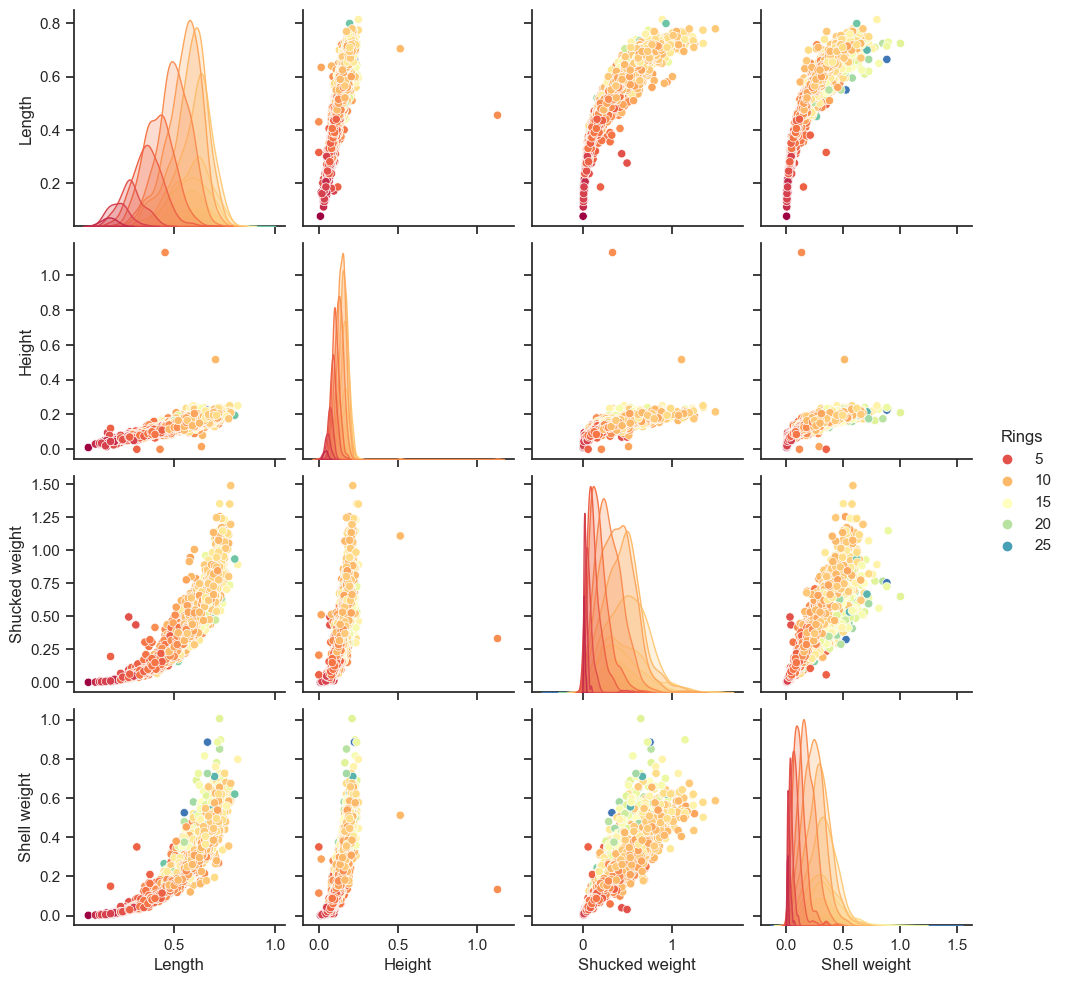

In [23]:
v_hue=0
tmp_title = print_title('Pairs Plots', 'Xs2+Target features (hue='+var_for_hue[v_hue]+')')
# sns.pairplot(D, vars=Xcolnames, hue = Ycolname, palette="Set2")
rel = sns.pairplot(D, vars=Xs2, hue = var_for_hue[v_hue], palette="Spectral")
rel.fig.suptitle(tmp_title, y=1.08)

### (abalone) Pairs Plots [Xs2+Target features (hue=Length)]

Text(0.5, 1.08, '')

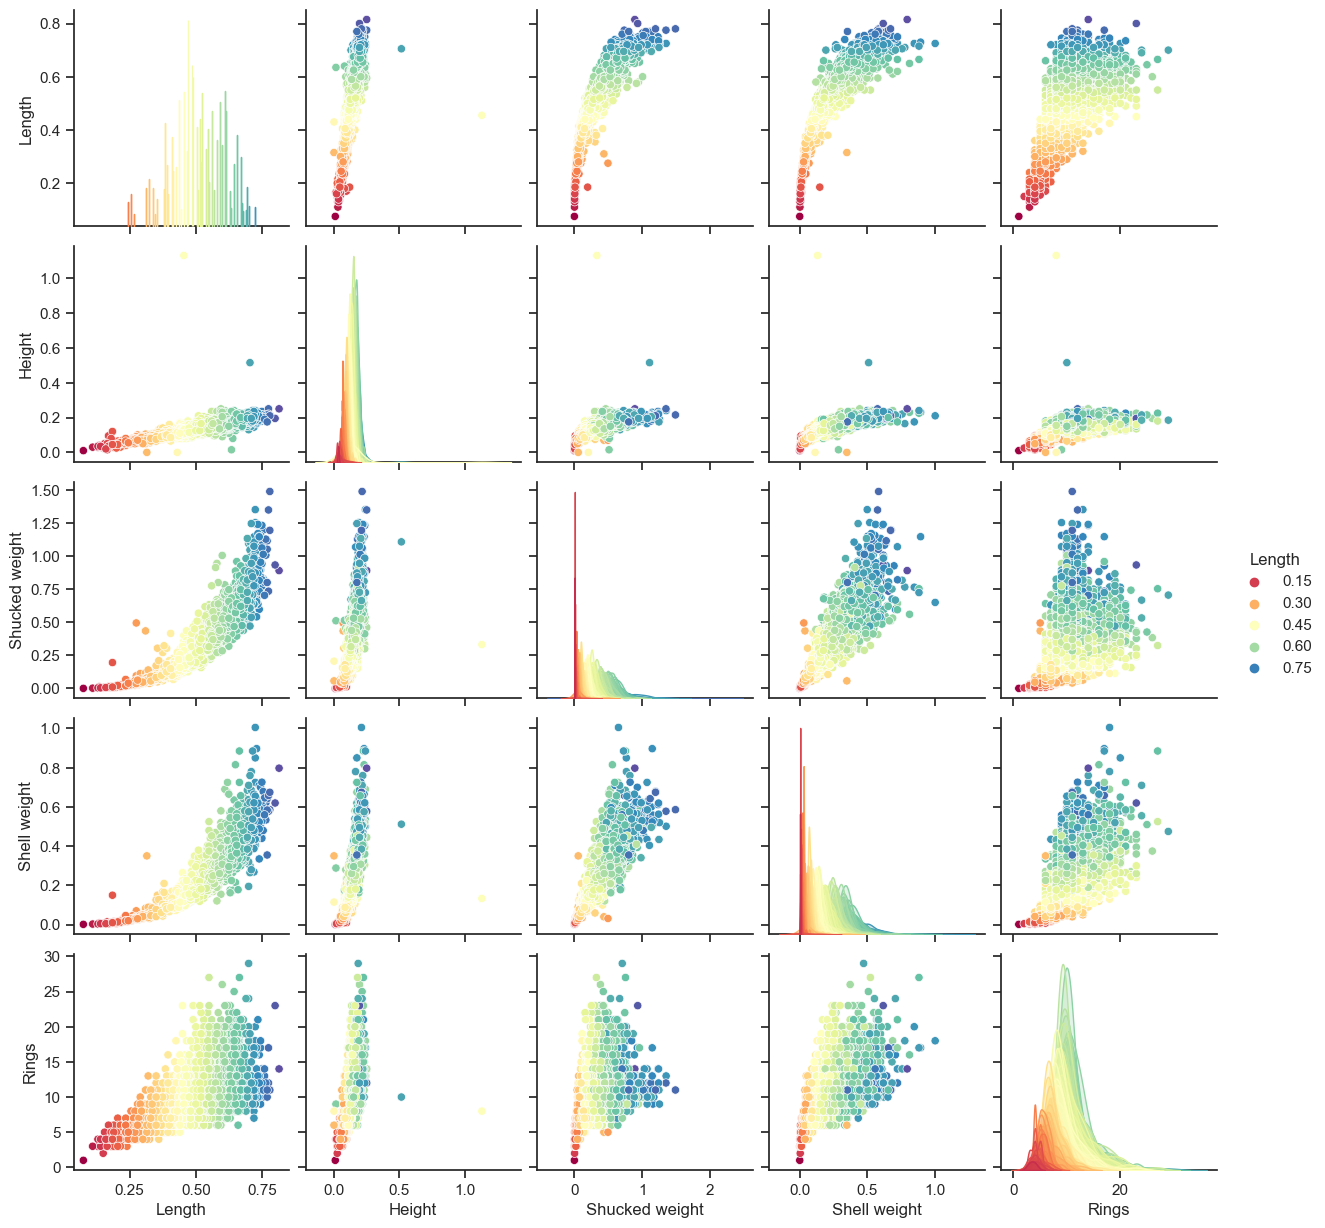

In [24]:
v_hue=1
tmp_title = print_title('Pairs Plots', 'Xs2+Target features (hue='+var_for_hue[v_hue]+')')
# sns.pairplot(D, vars=Xcolnames, hue = Ycolname, palette="Set2")
rel = sns.pairplot(D, vars=Xs2+[Ycolname], hue = var_for_hue[v_hue],palette="Spectral")
rel.fig.suptitle(tmp_title, y=1.08)

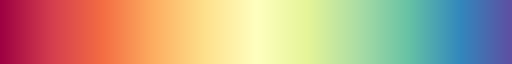

In [25]:
sns.color_palette("Spectral", as_cmap=True)
                  # n_colors=D[var_for_hue[v_hue]].max()-D[var_for_hue[v_hue]].min())


### (abalone) Pairs Plots [Xs2+Target features (hue=Height)]

Text(0.5, 1.08, '')

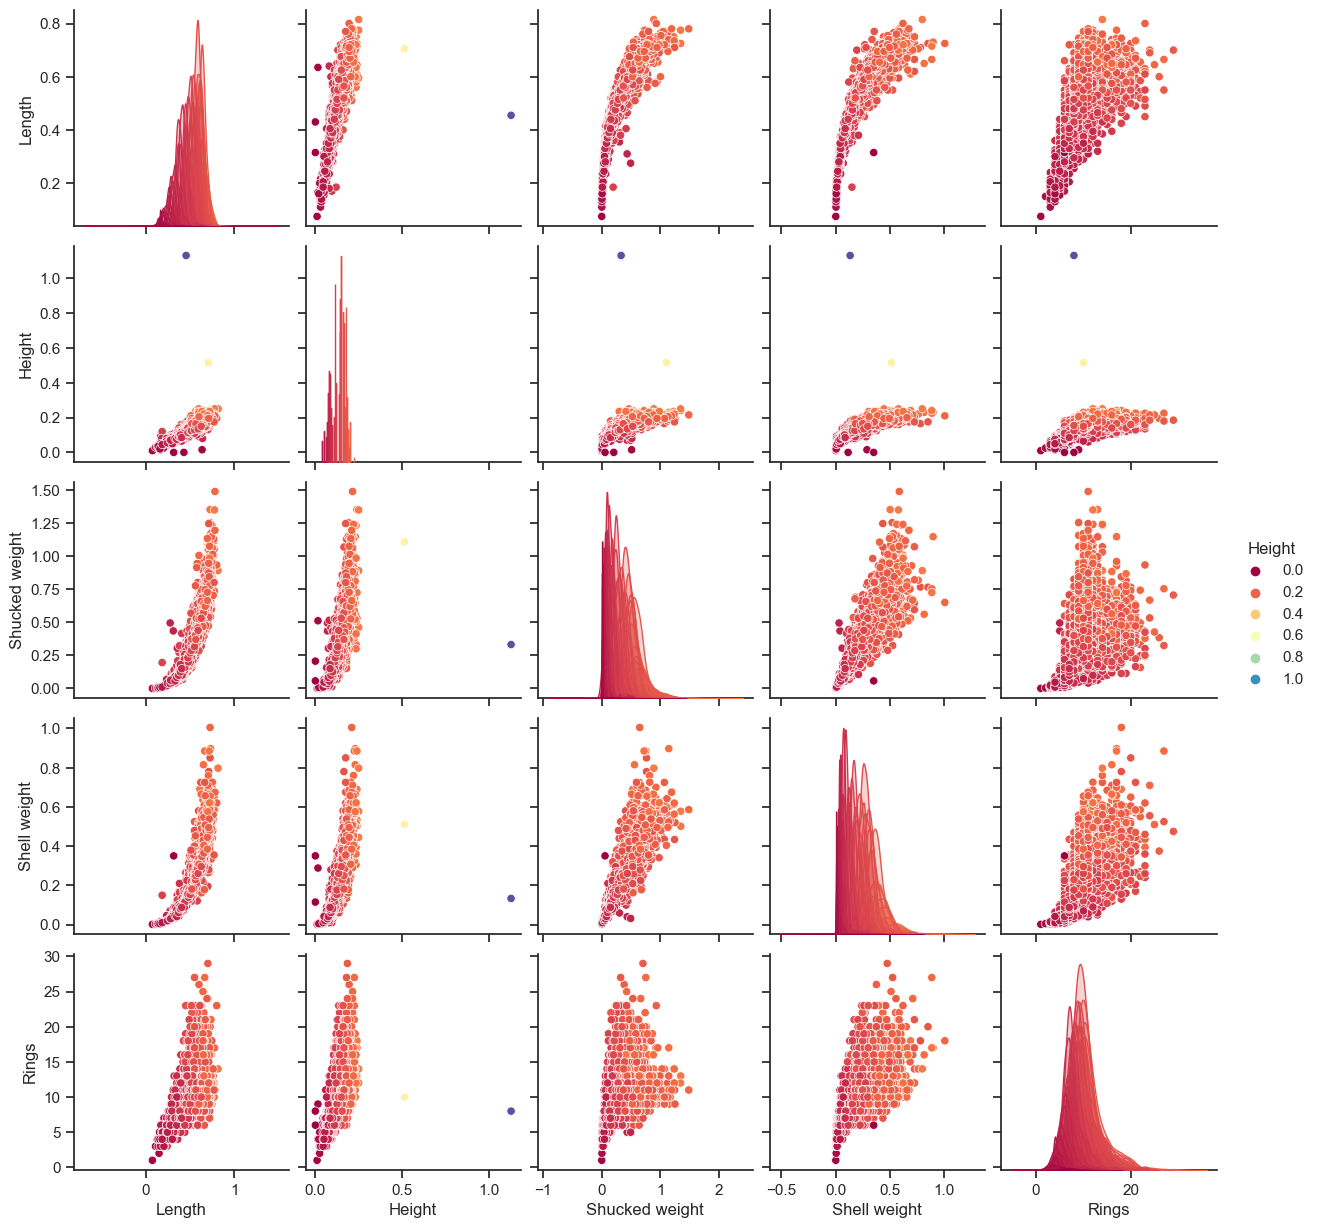

In [26]:
v_hue=2

tmp_title = print_title('Pairs Plots', 'Xs2+Target features (hue='+var_for_hue[v_hue]+')')
# sns.pairplot(D, vars=Xcolnames, hue = Ycolname, palette="Set2")
rel = sns.pairplot(D, vars=Xs2+[Ycolname], hue = var_for_hue[v_hue], palette="Spectral")
rel.fig.suptitle(tmp_title, y=1.08)

# Preprocessing Tasks

In the class we talked about how to normalize data and introduced basic distance metrics. We will explore the effect of a variety of these methods on the wine quality simple dataset for a distance based classifier, k nearest neighbours (knn). For this question you can use scikitlearn libraries for all the tasks.


## Normalization

In [27]:
from scipy import stats

In [28]:
# Trying first with the z-score function
X_train_normalized = X_train.apply(stats.zscore)
X_test_normalized = X_test.apply(stats.zscore)
#NOTE : this is slightly incorrect since we are not seeing all the data now

We are printing out statistics about the normalized data here to ensure it still makes sense and that normalization has occured correctly.

In [29]:
display("Training Data")
display(X_train_normalized.head())
display(X_train_normalized.describe())

display("Testing Data")
display(X_test_normalized.head())
display(X_test_normalized.describe())

'Training Data'

Length  Diameter    Height  Whole weight  Shucked weight  \
1442 -0.920469 -0.949694 -0.634764     -0.907584       -0.722070   
1008  0.742654  0.709579  0.518028      0.843877        0.997819   
1419  1.532638  1.413513  0.774204      1.577542        1.706405   
3641 -0.504688 -0.547446 -0.506676     -0.688398       -0.560620   
1080 -0.754157 -0.798851 -0.762852     -0.859891       -0.704131   

      Viscera weight  Shell weight  
1442       -1.067624     -0.986839  
1008        0.702652      0.634900  
1419        1.480845      1.492207  
3641       -0.758167     -0.722503  
1080       -0.785472     -1.036848

Length      Diameter        Height  Whole weight  Shucked weight  \
count  3.340000e+03  3.340000e+03  3.340000e+03  3.340000e+03    3.340000e+03   
mean  -6.275752e-16 -3.680356e-16 -2.595396e-16  8.509494e-18    5.956646e-17   
std    1.000150e+00  1.000150e+00  1.000150e+00  1.000150e+00    1.000150e+00   
min   -3.747779e+00 -3.564306e+00 -3.580788e+00 -1.694017e+00   -1.621255e+00   
25%   -6.294225e-01 -5.977267e-01 -6.347642e-01 -7.883511e-01   -7.758863e-01   
50%    1.605611e-01  1.564883e-01  1.337637e-01 -5.468569e-02   -9.645163e-02   
75%    7.426543e-01  7.598604e-01  6.461157e-01  6.662953e-01    6.530567e-01   
max    2.405778e+00  2.419133e+00  9.612275e+00  4.036285e+00    5.047519e+00   

       Viscera weight  Shell weight  
count    3.340000e+03  3.340000e+03  
mean    -3.446345e-16 -9.147706e-17  
std      1.000150e+00  1.000150e+00  
min     -1.654682e+00 -1.711978e+00  
25%     -7.957111e-01 -7.760842e-01  
50%     -8.919368e-02 -4.380116e-02  
75%      6.719338e-01  6.349002e-01  
max      5.258040e+00  5.457252e+00

'Testing Data'

Length  Diameter    Height  Whole weight  Shucked weight  \
4131  0.568178  0.695572  0.611738      0.391355        0.103575   
1494  0.861852  0.339074  0.320224      0.447663        0.598142   
3539 -0.606518 -0.475776 -0.845832     -0.908948       -0.945369   
4089  0.819899  0.746500  1.291937      1.125447        1.161719   
1271 -0.354798 -0.475776 -0.748661     -0.612808       -0.430098   

      Viscera weight  Shell weight  
4131        0.606034      0.628406  
1494        0.573713      0.333561  
3539       -0.880715     -0.808963  
4089        0.993881      1.033817  
1271       -0.765284     -0.661541

Length      Diameter        Height  Whole weight  Shucked weight  \
count  8.360000e+02  8.360000e+02  8.360000e+02  8.360000e+02    8.360000e+02   
mean  -7.649384e-16 -4.334651e-16  7.224418e-17 -1.402387e-16   -2.294815e-16   
std    1.000599e+00  1.000599e+00  1.000599e+00  1.000599e+00    1.000599e+00   
min   -3.165678e+00 -3.022185e+00 -2.400574e+00 -1.633655e+00   -1.571054e+00   
25%   -6.065182e-01 -6.285608e-01 -5.543184e-01 -8.435155e-01   -8.148259e-01   
50%    1.486436e-01  1.353617e-01  2.870972e-02 -8.465814e-02   -1.161053e-01   
75%    7.359918e-01  7.464997e-01  5.145665e-01  6.476092e-01    6.366726e-01   
max    2.204362e+00  2.019704e+00  1.926864e+01  3.655145e+00    3.899094e+00   

       Viscera weight  Shell weight  
count    8.360000e+02  8.360000e+02  
mean    -1.912346e-16  1.742360e-16  
std      1.000599e+00  1.000599e+00  
min     -1.582534e+00 -1.664013e+00  
25%     -8.206906e-01 -8.089629e-01  
50%     -1.027113e-01 -7.185080e-02  
75%      6.256568e-01  6.284057e-01  
max      3.699578e+00  3.650565e+00

# 2 KNN
We will use the k-Nearest Neighbours classifier on this dataset an analyse the effectiveness of different normalization and weighting schemes on accuracy. The following datastructures list out the indicies for the neighbours, the names of the kNN distance weighting schemes for display, and datasctructures to store the accuracy calculations as we go along.

In [30]:
n_neighborslist = list(range(1,kmax,kstep))
#Names of the types of distance-based weighting schemes
col_names = ['uniform', 'euclidean','manhattan']

In [31]:
accuracy_scores = pd.DataFrame(0,index=n_neighborslist, columns=col_names)

In [32]:
accuracy_normalizedData = pd.DataFrame(0,index=n_neighborslist, columns=col_names)

In [33]:
# cm_nonNormalized = pd.DataFrame(0,index=n_neighborslist, columns=y_values)
# cm_nonNormalized = {}

# KNN Accuracy with NO normalization (ablation question)

In [34]:
# Some preliminary variables

knn_plot_ylim=(.5,.9) #are these always good values?

## With uniform weights 

In [35]:
# Define the weighting scheme, distance metric (if any) and normalization for this experiment
ex_weight='uniform'
ex_distance='uniform' #needs to be repeated for the two parameters of the knn function
ex_norm='no normalization'
tstr_knn_ex_all_weights = "{}:KNN with maxk={} in {}-step increments, using multiple weightings, and {}.".format(Dname,kmax,kstep,ex_norm)
tstr_knn_ex = "{}:KNN with k={} in {}-step increments, using {} weighting, and {}.".format(Dname,kmax,kstep,ex_distance,ex_norm)
txt_exper_info_short = "KNN k=[1:{}:{}] w={} norm={}".format(kstep,kmax,ex_distance,ex_norm)
print( tstr_knn_ex, '\n', txt_exper_info_short )  

abalone:KNN with k=40 in 1-step increments, using uniform weighting, and no normalization. 
 KNN k=[1:1:40] w=uniform norm=no normalization


In [36]:
for k in range(1,kmax,kstep):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=ex_weight)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_probas = clf.predict_proba(X_test)
    # accscore = accuracy_score(y_test, y_pred)
    accscore = recall_score(y_test, y_pred, average='micro')
    accuracy_scores.loc[k,ex_distance] = accscore
    
    # if k%3==0:
    # print(y_test.head)
    # print(y_pred)
    # cm_nonNormalized[k] = confusion_matrix(y_test, y_pred, labels=y_values).copy()

In [37]:
y_probas.shape

(836, 28)

In [38]:
display(pd.DataFrame(y_probas).describe())

0           1           2           3           4           5   \
count  836.000000  836.000000  836.000000  836.000000  836.000000  836.000000   
mean     0.000031    0.000153    0.004018    0.012759    0.027941    0.071832   
std      0.000887    0.001978    0.028705    0.063076    0.082976    0.115760   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.102564   
max      0.025641    0.025641    0.256410    0.487179    0.461538    0.487179   

               6           7           8           9   ...          18  \
count  836.000000  836.000000  836.000000  836.000000  ...  836.000000   
mean     0.096890    0.137836    0.180867    0.157036  ...    0.006625   
std      0.119314    0.119459    0.115895    0.104966  ...    0.017751   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.051282    0.102564    0.076923  ...    0.000000   
50%      0.025641    0.102564    0.179487    0.153846  ...    0.000000   
75%      0.179487    0.205128    0.256410    0.230769  ...    0.000000   
max      0.435897    0.512821    0.615385    0.461538  ...    0.102564   

               19          20          21          22          23          24  \
count  836.000000  836.000000  836.000000  836.000000  836.000000  836.000000   
mean     0.004294    0.001871    0.001196    0.001380    0.000307    0.000215   
std      0.014323    0.007964    0.005411    0.006434    0.003058    0.002338   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      0.128205    0.076923    0.025641    0.051282    0.051282    0.025641   

               25          26          27  
count  836.000000  836.000000  836.000000  
mean     0.000245    0.000061    0.000184  
std      0.002498    0.001253    0.002166  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      0.025641    0.025641    0.025641  

[8 rows x 28 columns]

In [39]:
# print('Accuracy scores for {}'.format(tstr_knn_ex))
# display(accuracy_scores.head())
accuracy_scores.describe()

uniform  euclidean  manhattan
count  39.000000       39.0       39.0
mean    0.264109        0.0        0.0
std     0.027065        0.0        0.0
min     0.188995        0.0        0.0
25%     0.248206        0.0        0.0
50%     0.273923        0.0        0.0
75%     0.285885        0.0        0.0
max     0.293062        0.0        0.0

## Weighted KNN with Euclidean Distance

Now we want to use the weighted kNN algorithm to modify the way distances are used for each neighbour. Now on top of the k nearest neighbours being utilized, the *importance* of each neighbouring point will be inversely proportional to its distance under two distance metrics: Euclidean and Mahatten distance. We compute the classification results for kNN with these parameters in the same way as before and store into two new locations in `accuracy_scores`.

In [40]:
# Define the weighting scheme, distance metric (if any) and normalization for this experiment
ex_weight='distance'
ex_distance='euclidean' #needs to be repeated for the two parameters of the knn function
ex_norm='no normalization'
tstr_knn_ex_all_weights = "KNN with maxk={} in {}-step increments, using multiple weightings, and {}.".format(kmax,kstep,ex_norm)
tstr_knn_ex = "KNN with maxk={} in {}-step increments, using {} weighting, and {}.".format(kmax,kstep,ex_distance,ex_norm)
txt_exper_info_short = "KNN k=[1:{}:{}] w={} norm={}".format(kstep,kmax,ex_distance,ex_norm)
print( tstr_knn_ex, '\n', txt_exper_info_short )  


KNN with maxk=40 in 1-step increments, using euclidean weighting, and no normalization. 
 KNN k=[1:1:40] w=euclidean norm=no normalization


In [41]:
for k in range(1,kmax,kstep):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=ex_weight,metric=ex_distance)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # accscore = accuracy_score(y_test, y_pred)
    accscore = recall_score(y_test, y_pred, average='micro')
    accuracy_scores.loc[k,ex_distance] = accscore
    

## Weighted KNN with Manhattan Distance

In [42]:
# Define the weighting scheme, distance metric (if any) and normalization for this experiment
ex_weight='distance'
ex_distance='manhattan' #needs to be repeated for the two parameters of the knn function
ex_norm='no normalization'
tstr_knn_ex_all_weights = "KNN with maxk={} in {}-step increments, using multiple weightings, and {}.".format(kmax,kstep,ex_norm)
tstr_knn_ex = "KNN with k={} in {}-step increments, using {} weighting, and {}.".format(kmax,kstep,ex_distance,ex_norm)
print( tstr_knn_ex )    

KNN with k=40 in 1-step increments, using manhattan weighting, and no normalization.


In [43]:
for k in range(1,kmax,kstep):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=ex_weight, metric=ex_distance)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # accscore = accuracy_score(y_test, y_pred)
    accscore = recall_score(y_test, y_pred, average='micro')
    accuracy_scores.loc[k,ex_distance] = accscore
    
    # if k%3==0:
    # print(y_test.head)
    # print(y_pred)
    # cm_nonNormalized[k] = confusion_matrix(y_test, y_pred, labels=y_values).copy()

In [44]:
print('Accuracy scores for {}'.format(tstr_knn_ex))
display(accuracy_scores.head(15))
accuracy_scores.describe()

# SOLUTION: SHUTTLE max recall is .9999310 at k=4

Accuracy scores for KNN with k=40 in 1-step increments, using manhattan weighting, and no normalization.


uniform  euclidean  manhattan
1   0.191388   0.191388   0.221292
2   0.215311   0.191388   0.221292
3   0.188995   0.203349   0.227273
4   0.227273   0.224880   0.238038
5   0.232057   0.236842   0.248804
6   0.242823   0.241627   0.247608
7   0.250000   0.250000   0.246411
8   0.248804   0.250000   0.257177
9   0.247608   0.261962   0.254785
10  0.241627   0.257177   0.260766
11  0.241627   0.259569   0.267943
12  0.240431   0.252392   0.255981
13  0.253589   0.266746   0.261962
14  0.261962   0.255981   0.261962
15  0.261962   0.263158   0.259569

uniform  euclidean  manhattan
count  39.000000  39.000000  39.000000
mean    0.264109   0.266746   0.270120
std     0.027065   0.027188   0.020935
min     0.188995   0.191388   0.221292
25%     0.248206   0.256579   0.258373
50%     0.273923   0.276316   0.273923
75%     0.285885   0.287081   0.287081
max     0.293062   0.294258   0.302632

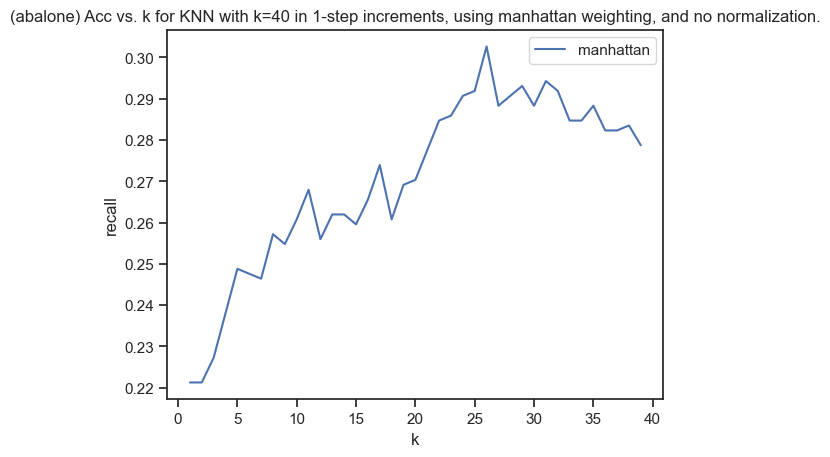

In [45]:
#TODO: hide this plot for final report
#ax = plt.gca(title='KNN Classification Acc without Normalization', ylim=knn_plot_ylim)
ax = my_plt_gca(title='Acc vs. k for {}'.format(tstr_knn_ex) , xlabel='k', ylabel=str_stattoplot)

accuracy_scores.plot(kind='line',y=ex_distance,ax=ax)
# accuracy_scores.plot(kind='line',y='euclidean', color='red', ax=ax)
# accuracy_scores.plot(kind='line',y='manhattan', color='g', ax=ax)

plt.show()

## Comparing KNN classification accuracy among the three weighting schemes (No normalization)
Now combine all of these accuracy results into a single plot.

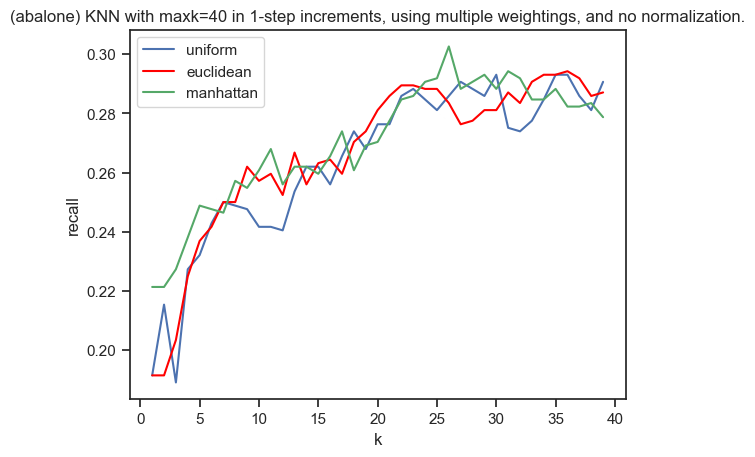

In [46]:
#ax = plt.gca(title='KNN Classification Acc without Normalization', ylim=knn_plot_ylim)
ax = my_plt_gca(title=tstr_knn_ex_all_weights, xlabel='k', ylabel=str_stattoplot)

accuracy_scores.plot(kind='line',y='uniform',ax=ax)
accuracy_scores.plot(kind='line',y='euclidean', color='red', ax=ax)
accuracy_scores.plot(kind='line',y='manhattan', color='g', ax=ax)

plt.show()

# Accuracy of weighted KNN with normalized data
Once again, we compute the kNN solution for each weighting scheme, using the normalized data.

## Weighted KNN with uniform weights

In [47]:
# Define the weighting scheme, distance metric (if any) and normalization for this experiment
ex_weight='uniform'
ex_distance='uniform' #needs to be repeated for the two parameters of the knn function
ex_norm='normalization'
tstr_knn_ex_all_weights = "KNN with maxk={} in {}-step increments, using multiple weightings, and {}.".format(kmax,kstep,ex_norm)
tstr_knn_ex = "KNN with k={} in {}-step increments, using {} weighting, and {}.".format(kmax,kstep,ex_distance,ex_norm)
txt_exper_info_short = "KNN k=[1:{}:{}] w={} norm={}".format(kstep,kmax,ex_distance,ex_norm)
print( tstr_knn_ex, '\n', txt_exper_info_short )  

KNN with k=40 in 1-step increments, using uniform weighting, and normalization. 
 KNN k=[1:1:40] w=uniform norm=normalization


In [48]:
for k in range(1,kmax,kstep):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=ex_weight)
    clf.fit(X_train_normalized, y_train)
    y_pred = clf.predict(X_test_normalized)
    accscore = recall_score(y_test, y_pred, average='micro')
    # accscore = accuracy_score(y_test, y_pred)
    accuracy_normalizedData.loc[k,ex_distance] = accscore

## Weighted KNN with Euclidean Distance

In [49]:
# Define the weighting scheme, distance metric (if any) and normalization for this experiment
ex_weight='distance'
ex_distance='euclidean' #needs to be repeated for the two parameters of the knn function
ex_norm='normalization'
tstr_knn_ex_all_weights = "KNN with maxk={} in {}-step increments, using multiple weightings, and {}.".format(kmax,kstep,ex_norm)
tstr_knn_ex = "KNN with k={} in {}-step increments, using {} weighting, and {}.".format(kmax,kstep,ex_distance,ex_norm)
txt_exper_info_short = "KNN k=[1:{}:{}] w={} norm={}".format(kstep,kmax,ex_distance,ex_norm)
print( tstr_knn_ex, '\n', txt_exper_info_short )    

KNN with k=40 in 1-step increments, using euclidean weighting, and normalization. 
 KNN k=[1:1:40] w=euclidean norm=normalization


In [50]:
for k in range(1,kmax,kstep):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=ex_weight, metric=ex_distance)
    clf.fit(X_train_normalized, y_train)
    y_pred = clf.predict(X_test_normalized)
    y_probas = clf.predict_proba(X_test)
    # accscore = accuracy_score(y_test, y_pred)
    accscore = recall_score(y_test, y_pred, average='micro')
    accuracy_normalizedData.loc[k,ex_distance] = accscore

## Weighted KNN with Manhattan Distance

In [51]:
# Define the weighting scheme, distance metric (if any) and normalization for this experiment
ex_weight='distance'
ex_distance='manhattan' #needs to be repeated for the two parameters of the knn function
ex_norm='normalization'
tstr_knn_ex_all_weights = "KNN with maxk={} in {}-step increments, using multiple weightings, and {}.".format(kmax,kstep,ex_norm)
tstr_knn_ex = "KNN with k={} in {}-step increments, using {} weighting, and {}.".format(kmax,kstep,ex_distance,ex_norm)
txt_exper_info_short = "KNN k=[1:{}:{}] w={} norm={}".format(kstep,kmax,ex_distance,ex_norm)
print( tstr_knn_ex, '\n', txt_exper_info_short )    

KNN with k=40 in 1-step increments, using manhattan weighting, and normalization. 
 KNN k=[1:1:40] w=manhattan norm=normalization


In [52]:
for k in range(1,kmax,kstep):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=ex_weight, metric=ex_distance)
    clf.fit(X_train_normalized, y_train)
    y_pred = clf.predict(X_test_normalized)
    # accscore = accuracy_score(y_test, y_pred)
    accscore = recall_score(y_test, y_pred, average='micro')
    accuracy_normalizedData.loc[k,ex_distance] = accscore

## Comparing KNN classification accuracy among the three weighting schemes (with normalization)

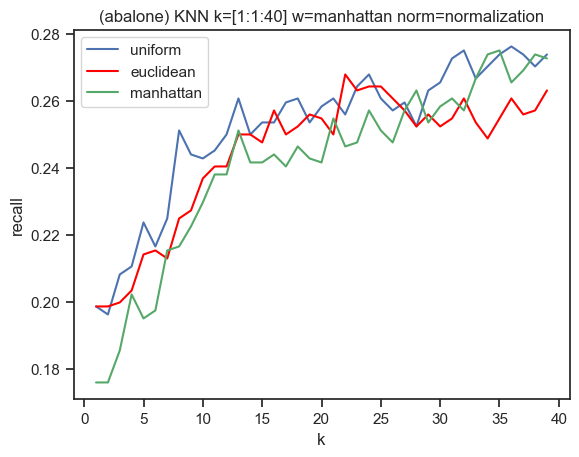

In [53]:
#ax = plt.gca(title='KNN Classification Acc with Normalization', ylim=knn_plot_ylim)
ax = my_plt_gca(title=txt_exper_info_short, xlabel='k', ylabel=str_stattoplot)

accuracy_normalizedData.plot(kind='line',y='uniform',ax=ax)
accuracy_normalizedData.plot(kind='line',y='euclidean', color='red', ax=ax)
accuracy_normalizedData.plot(kind='line',y='manhattan', color='g', ax=ax)

plt.show()